# 데이터 시각화 연습문제 (1)

In [146]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel, pivot_table
import numpy as np

In [147]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 글자 크기
plt.rcParams['font.size'] = 12
# 그래프 크기 설정(inch) inch 의 감이 없으니까 걍 inch [10,5]로 잡고 늘렸다가 줄였다가 하세욤
plt.rcParams['figure.figsize'] = (20,5)
# 유니코드에서 음수 부호 설정 (안하면 D로 표기됨)
plt.rcParams['axes.unicode_minus'] = False


#### 문제1

다음 데이터는 `2021년 06월 01일`부터 `2023년 06월 30일`까지의 비트코인 시세 데이터의 일부이다.

| 날짜         | 종가      | 시가      | 고가      | 저가      | 거래량     | 변동 %   |
|------------|---------|---------|---------|---------|---------|--------|
| 2021-06-01 | 36,688  | 37,294  | 37,850  | 35,743  | 113.48K | -1.64% |
| 2021-06-02 | 37,556  | 36,688  | 38,200  | 35,981  | 96.89K  | 2.37%  |
| 2021-06-03 | 39,187  | 37,556  | 39,462  | 37,194  | 106.44K | 4.34%  |
| 2021-06-04 | 36,851  | 39,191  | 39,255  | 35,660  | 127.71K | -5.96% |
| 2021-06-05 | 35,520  | 36,841  | 37,888  | 34,832  | 101.48K | -3.61% |
| 2021-06-06 | 35,815  | 35,519  | 36,434  | 35,265  | 62.20K  | 0.83%  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/bitcoin.xlsx

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 10일 간격으로 설정하여 구현하시오.

In [149]:
df = read_excel('https://data.hossam.kr/D01/bitcoin.xlsx')
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


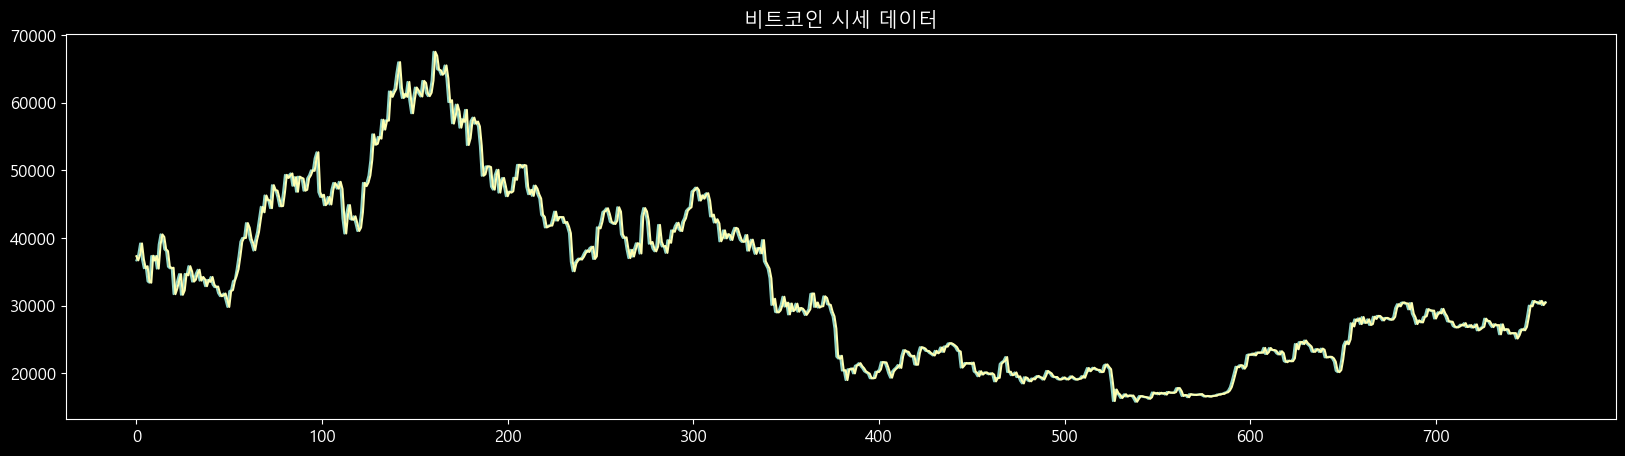

In [150]:
## line Plot 그리기 
plt.figure()
x = list(range(0,len(df['날짜'])))
#x # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9

# xticks 함수에서 사용할 x좌표 생성
xticks = list(range(0,len(df['날짜']),30))
# xticks # [0,10, 20, 30, 40,...  # 표기할 10단위 친구들을 데려옴 

# xticks 함수에서 출력할 날짜 값 추출
date = []
for i in xticks :
    date.append(df['날짜'][i].strftime('%y/%m/%d')) #  format 으로 가리키는 스트링에서 제어하는 대로, s로 가리키는 배열에 바이트를 배치한다. 
# date

plt.plot(x,df['종가'])
plt.plot(x,df['시가'])
plt.title('비트코인 시세 데이터')
plt.show()
plt.close()

In [ ]:
# xlables = list(df['날짜'])
# x = np.array(range(0,len(xlables)))
# # y축 데이터
# ylables1 = list(df['종가'])
# # y1 = list(np.array(range(0,len(ylables1),10)))
# ylables2 = list(df['시가'])
# # y2 = np.array(range(0,len(ylables2),10))
# ylables1

# # data_range()함수도 있음. 

# # 그래프 그리기
# plt.figure()
# plt.title('비트코인 시세 데이터')
# plt.plot(xlables,ylables1,color='red',label='종가')
# plt.plot(xlables,ylables2,color='#abc6d6',label='시가')
# plt.xlabel('날짜')
# plt.ylabel('금액')
# plt.grid()
# plt.legend(loc='lower right')
# plt.xticks(x,xlables)
# plt.show()
# plt.close()

## 문제2

다음 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 자료의 일부이다.

| 지역명          | 복지시설 |
|--------------|------|
| Jongno-gu    | 61   |
| Jung-gu      | 53   |
| Yongsan-gu   | 110  |
| Seongdong-gu | 155  |
| Gwangjin-gu  | 103  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/senior_lsf.xlsx

복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

In [151]:
df = read_excel('https://data.hossam.kr/D01/senior_lsf.xlsx')
df

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [152]:
#복지시설이 많은 상위 10개 지역으로 정렬 -> 상위 10개 추리기 
복지 = df.sort_values('복지시설',ascending=False)
복지상위 = 복지.head(10)
복지상위

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


In [153]:
xlables = list(복지상위['지역명'])
ylables = list(복지상위['복지시설'])

TypeError: 'str' object is not callable

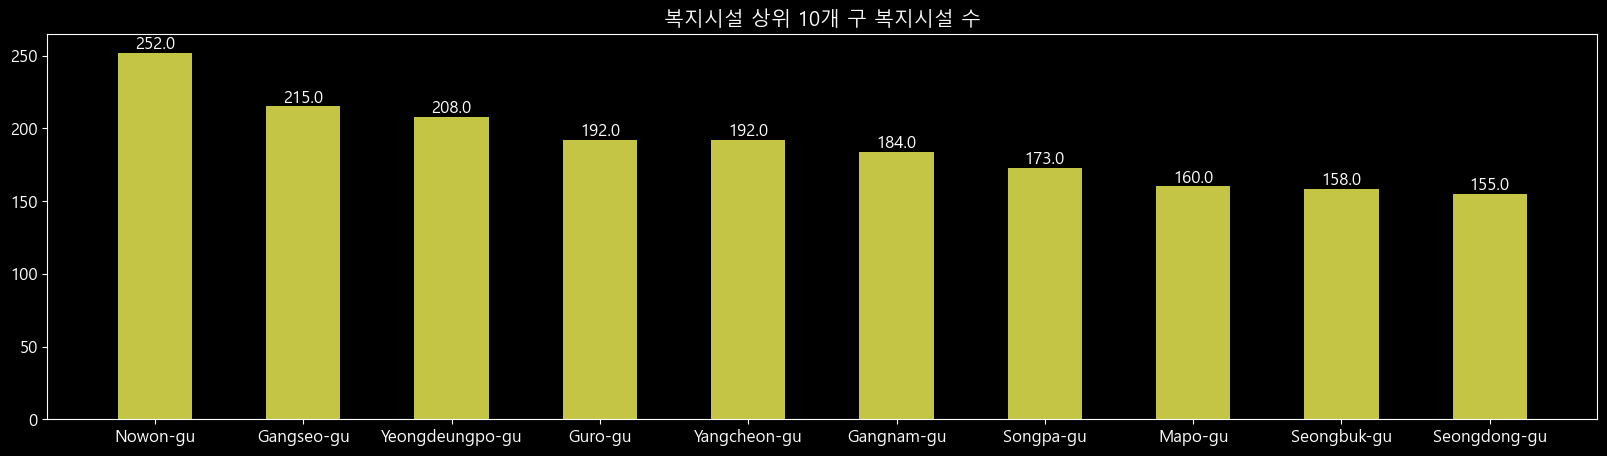

In [154]:
x = xlables
y = ylables
plt.figure()
plt.title('복지시설 상위 10개 구 복지시설 수')

# 각 막대의 색상을 단색으로 지정
plt.bar(x,y,color ='#c4c445',width=0.5,align='center')
bar = plt.bar(x,y,color ='#c4c445',width=0.5,align='center')

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xlabel('지역명')
plt.ylabel('복지시설')

plt.show()
plt.close()

## 문제3

다음 데이터는 도시별 인수수를 5개년도 단위로 조사한 가상의 자료이다.

> https://data.hossam.kr/city_people.xlsx

| 도시 | 연도   | 인구      | 지역  |
|----|------|---------|-----|
| 서울 | 2015 | 9904312 | 수도권 |
| 서울 | 2010 | 9631482 | 수도권 |
| 서울 | 2005 | 9762546 | 수도권 |
| 부산 | 2015 | 3448737 | 경상권 |
| 부산 | 2010 | 3393191 | 경상권 |
| 부산 | 2005 | 3512547 | 경상권 |
| 인천 | 2015 | 2890451 | 수도권 |
| 인천 | 2010 | 2632035 | 수도권 |

각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.

In [ ]:
df = read_excel('https://data.hossam.kr/D01/city_people.xlsx')
df

In [ ]:
# 2015년 2010년 데이터 추출
df2 = df.query('연도 == 2015 or 연도 == 2010')
df2
df3 = pivot_table(df2,
            index='도시', 
            columns='연도', 
            values='인구',
            aggfunc='mean' # 통계학적 의미의 평균
)
df3

In [ ]:
x_rables=list(df3.index)
x_rables

In [ ]:
x = np.array(range(0,len(x_rables)))

In [ ]:
# y축 데이터
y1 = list(df3[2010])
y2 = list(df3[2015])
y1

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)

# 그래프 그리기
plt.figure()
plt.title('지역별 인구 수 비교')
# 각 막대의 색상을 단색으로 지정
plt.bar(x-0.2,df3[2015],color='#32a852',label='2010',width=0.3)
plt.bar(x+0.2,df3[2010],color='#344037',label='2015',width=0.3)

plt.xlabel('지역')
plt.ylabel('인구수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.ylim(2000000,10000000) # 크기 
plt.show()
plt.close()


## 문제4

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

이 데이터에 대해 아래의 요구사항을 충족하는 시각화 결과물을 구현하시오.

> https://data.hossam.kr/jobs_by_scale.xlsx

| 종사자규모별   | 2015  | 2016  |
|----------|-------|-------|
| 1~4명     | 553.5 | 576.7 |
| 5~9명     | 211.6 | 216.8 |
| 10~29명   | 194.7 | 195.5 |
| 30~49명   | 227.4 | 227.4 |
| 50~99명   | 152.8 | 155.7 |
| 100~199명 | 221.9 | 220.6 |
| 200~299명 | 80.9  | 81    |
| 300~999명 | 100.5 | 99.3  |
| 1000명 이상 | 557.6 | 549.7 |

### 요구사항 1

종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

### 요구사항 2

종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

In [ ]:
df = read_excel('https://data.hossam.kr/D01/jobs_by_scale.xlsx')
df

문제 1 ) 종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
# 그래프 그리기
plt.figure()
plt.title('종사자 규모별 업체 수')
plt.bar(df.index-0.2,df[2015],color='#767782',label='2015',width=0.4)
plt.bar(df.index+0.2,df[2016],color='#abc6dd',label='2016',width=0.4)

plt.xlabel('종사자규모')
plt.ylabel('업체수')


plt.grid()
plt.legend()
plt.xticks(x,xlables)
plt.show()
plt.close()

In [ ]:
# 그래프 그리기
plt.figure()
plt.title('종사자 규모별 업체 수')
plt.bar(x-0.2,y1,color='#767782',label='2015',width=0.4)
plt.bar(x+0.2,y2,color='#abc6d6',label='2016',width=0.4)

bar1 = plt.bar(x-0.2,y1,color='#767782',label='2015',width=0.4)
bar2 = plt.bar(x+0.2,y2,color='#abc6d6',label='2016',width=0.4)

plt.xlabel('종사자규모')
plt.ylabel('업체수')


plt.grid()
plt.legend()
plt.xticks(x,xlables)
plt.show()
plt.close()

요구사항 2 ) 종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

In [ ]:
# 각 데이터별 색상
colors = ['#fcd2f3','#00bef7','#8f6f50','#c3d2de']
# 각 데이터별 확대비율
explode = (0,0.1,0,0)

plt.figure()
plt.title('2015년')
plt.pie(df[2015],labels=df['종사자규모별'],autopct="%0.1f%%")
plt.show()
plt.close()

In [ ]:
# 각 데이터별 색상
colors = ['#fcd2f3','#00bef7','#8f6f50','#c3d2de']
# 각 데이터별 확대비율
explode = (0,0.1,0,0)

plt.figure()
plt.title('2016년')
plt.pie(df[2016],labels=df['종사자규모별'],autopct="%0.1f%%")
plt.show()
plt.close()


## 문제 5

아래의 데이터는 2002년도부터 2018년도까지 월별 교통사고의 발생건수, 사망자수, 부상자수를 조사한 데이터의 일부이다.

| 년도   | 월 | 발생건수   | 사망자수 | 부상자수   |
|------|---|--------|------|--------|
| 2005 | 1 | 15494  | 504  | 25413  |
| 2005 | 2 | 13244  | 431  | 21635  |
| 2005 | 3 | 16580  | 477  | 25550  |
| 2005 | 4 | 17817  | 507  | 28131  |
| 2005 | 5 | 19085  | 571  | 29808  |
| 2005 | 6 | 18092  | 476  | 28594  |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/traffic_acc.xlsx

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

In [ ]:
df = read_excel('https://data.hossam.kr/D01/traffic_acc.xlsx')
df

In [ ]:
# x축에 표시할 텍스트
발생건수 = df['발생건수']
부상자수 = df['부상자수']

In [ ]:
plt.rcParams['figure.figsize'] = (12,5)
#교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.
plt.figure()
plt.title("교통사고 발생건수와 부상자수의 상관관계")
plt.xlabel='발생건수'
plt.ylabel='부상자수'
plt.scatter(발생건수,부상자수)
plt.legend()
plt.grid()
plt.show()
plt.close()